In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

In [2]:
#tampilan data awal
url ='C:/Users/HOME/Desktop/Data_iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pandas.read_csv(url, names=names)
print(data)

    sepal-length  sepal-width  petal-length  petal-width            class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
5            5.4          3.9           1.7          0.4      Iris-setosa
6            4.6          3.4           1.4          0.3      Iris-setosa
7            5.0          3.4           1.5          0.2      Iris-setosa
8            4.4          2.9           1.4          0.2      Iris-setosa
9            4.9          3.1           1.5          0.1      Iris-setosa
10           5.4          3.7           1.5          0.2      Iris-setosa
11           4.8          3.4           1.6          0.2      Iris-setosa
12           4.8          3.0         

In [3]:
data_iris = np.zeros((100,4))
class_fact = np.zeros((100))
def saveData():
    for i in range (100):
        for j in range(5):
            if j == 4:
                if data.iloc[i][j]=="Iris-setosa":
                    class_fact[i]=1
                else:
                    class_fact[i]=0
            else:
                data_iris[i][j] = data.iloc[i][j]
            

In [4]:
saveData()
class_fact[0]

1.0

In [5]:
new_tetha = np.zeros((101, 5))
new_tetha[0]=([0.2, 0.6, 0.3, 0.4, 0.9])
tetha = [0.2, 0.6, 0.3, 0.4, 0.9]
error = np.zeros(100)
dTetha = np.zeros((100, 5))
dBias = 0.0
alpha = 0.1
#alpha = 0.8
prediksi = []

In [6]:
#fungsi h(x,tetha,bias)
def h_function(i):
    return data_iris[i][0]*tetha[0]+data_iris[i][1]*tetha[1]+data_iris[i][2]*tetha[2]+data_iris[i][3]*tetha[3]+tetha[4]

In [7]:
h_function(0)

4.5200000000000005

In [8]:
#fungsi sigmoid(h)
def sigmoid(i):
    return 1/(1+math.exp(-1.0*h_function(i)))

In [9]:
sigmoid(0)

0.9892282699548585

In [10]:
#Error
def error_function(i):
    return (class_fact[i]-sigmoid(i))**2

In [11]:
#Delta Tetha
def delta_tetha(i):
    for j in range(5):
        if j == 4:
            dTetha[i][j] = 2*(sigmoid(i)-class_fact[i])*(1-sigmoid(i))*sigmoid(i)
        else:
            dTetha[i][j] = 2*(sigmoid(i) - class_fact[i])*(1-sigmoid(i))*sigmoid(i)*data_iris[i][j]

In [12]:
#Update Tetha
def update_tetha(i):
    global tetha
    for j in range(4):
        new_tetha[i+1][j]=tetha[j]-(alpha*dTetha[i][j])
    tetha = new_tetha[i+1]

In [13]:
error_function(0)
delta_tetha(0)

In [14]:
def start():
    Epoch = 60
    alpha = 0.1
    #alpha = 0.8
    x=np.zeros(Epoch)
    saveData()
    for j in range (Epoch):
        for i in range(100):
            h_function(i)
            sigmoid(i)
            error_function(i)
            delta_tetha(i)
            update_tetha(i)
            x[j]=x[j]+error_function(i)
    plt.plot(x)
    plt.show
            

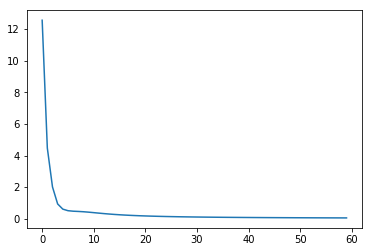

In [15]:
start()